In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [ ]:
EPOCHS = 30
BS = 32

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/digit-recognizer/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/digit-recognizer/test.csv')

In [ ]:
Y_train = train_data["label"]
X_train = train_data.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test_data / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1)

In [ ]:
datagen.fit(X_train)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=5,input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

optimizer=Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          3

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
history = model.fit(datagen.flow(X_train,Y_train, BS),
                              epochs=EPOCHS, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=300, callbacks=[annealer])

Epoch 1/30
300/300 [==============================] - 35s 118ms/step - loss: 0.1605 - accuracy: 0.9567 - val_loss: 0.0447 - val_accuracy: 0.9848
Epoch 2/30
300/300 [==============================] - 36s 119ms/step - loss: 0.1464 - accuracy: 0.9626 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 3/30
300/300 [==============================] - 35s 118ms/step - loss: 0.1174 - accuracy: 0.9664 - val_loss: 0.0312 - val_accuracy: 0.9917
Epoch 4/30
300/300 [==============================] - 35s 118ms/step - loss: 0.1179 - accuracy: 0.9683 - val_loss: 0.0410 - val_accuracy: 0.9864
Epoch 5/30
300/300 [==============================] - 36s 118ms/step - loss: 0.1075 - accuracy: 0.9681 - val_loss: 0.0388 - val_accuracy: 0.9890
Epoch 6/30
300/300 [==============================] - 35s 118ms/step - loss: 0.1017 - accuracy: 0.9725 - val_loss: 0.0374 - val_accuracy: 0.9893
Epoch 7/30
300/300 [==============================] - 35s 118ms/step - loss: 0.1019 - accuracy: 0.9709 - val_loss: 0.0287 - val_ac

[INFO] Plotting model accuracy and Loss


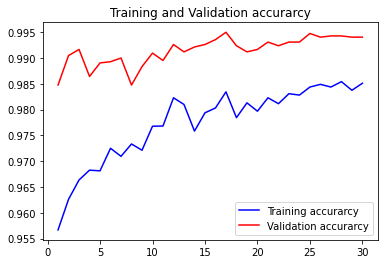

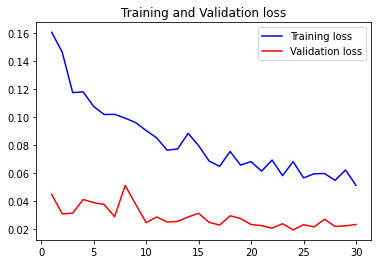

[INFO] Calculating model accuracy
1182/1182 [==============================] - 27s 23ms/step - loss: 0.0154 - accuracy: 0.9955
Model Accuracy: 99.55026507377625
132/132 [==============================] - 3s 23ms/step - loss: 0.0232 - accuracy: 0.9940
Test Accuracy: 99.40476417541504
[INFO] Saving model


In [ ]:
    print("[INFO] Plotting model accuracy and Loss")
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    #Train and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    #Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()

    print("[INFO] Calculating model accuracy")
    model_scores = model.evaluate(X_train, Y_train)
    print(f'Model Accuracy: {model_scores[1]*100}')

    val_scores = model.evaluate(X_val, Y_val)
    print(f"Test Accuracy: {val_scores[1]*100}")
    
    print("[INFO] Saving model")
    model.save('MNIST.h5')

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions, name="Label")
submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)
submit.to_csv("result.csv",index=False)